In [1]:
import os
import numpy as np
import torchvision
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

from modules import load_frame

%load_ext autoreload
%autoreload 2 

MLPs have two hidden layers
ReLU activation for hidden layers, Sigmoid for last layer

for f, each hidden layer has 256 nodes
for g, each hidden layer has 5000 nodes

Train with Adam optimizer.

learning schedule step-wise decay:
for f: start with 1e-4, then every 20 epochs, reduce it by 30%. Total 100 epochs.
for g: start with 1e-5, then every 200 epochs, reduce it by 30%. Total 600 epochs.

In [2]:
# Helper functions for visualizing dataset

def project_camera2d(projection_matrix: np.ndarray, points: np.ndarray):
    """
    Project 3D camera coordinate points into 2D camera plane

    Args:
        projection_matrix: 3x3 projection matrix
        points: (3 x N) 3d points

    Returns:
        (2 x N) 2d points
    """
    homogenous_coords = projection_matrix @ points
    camera_coords = homogenous_coords[:2] / homogenous_coords[2]
    return camera_coords


def plot_item(ax: Axes, path: str, frame: int):
    """
    Plots a single frame from data item onto axis

    Args:
        ax      : Matplot axis to plot onto
        path    : Path to h2o dataset video segment
        frame   : Frame number to load
    """
    hand, obj, _ = load_frame(path, frame)

    rgb_img = torchvision.io.read_image(
        os.path.join(path, f"cam4/rgb/{frame:06d}.png")
    )

    cam_intrinsics = np.loadtxt(os.path.join(path, f"cam4/cam_intrinsics.txt"))
    # 3D camera coordinate to 2D camera plane matrix
    projection_matrix = np.zeros((3, 3))
    projection_matrix[0, 0] = cam_intrinsics[0]
    projection_matrix[1, 1] = cam_intrinsics[1]
    projection_matrix[0, 2] = cam_intrinsics[2]
    projection_matrix[1, 2] = cam_intrinsics[3]
    projection_matrix[2, 2] = 1

    left_points = project_camera2d(
       projection_matrix, hand[:, :, 0]
    )

    right_points = project_camera2d(
        projection_matrix, hand[:, :, 1]
    )
    obj_points = project_camera2d(projection_matrix, obj)

    ax.imshow(np.transpose(rgb_img, axes=(1, 2, 0)))
    ax.scatter(left_points[0], left_points[1])
    ax.scatter(right_points[0], right_points[1])
    ax.scatter(obj_points[0], obj_points[1])
    ax.axis("off")

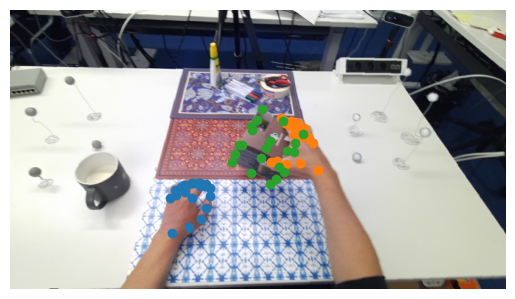

In [3]:

fig, ax = plt.subplots()
plot_item(ax, "./h2o/subject1/h1/0", 0)